In [1]:
# import libraries

import pandas as pd
from sklearn.impute import SimpleImputer
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.metrics import silhouette_score

In [2]:
# load dataset and convert to Dataframe

data = pd.read_csv('/Users/minkhant/Documents/IU/3rd Semester/Unsupervised ML/archive/mental-heath-in-tech-2016_20161114.csv')
df = pd.DataFrame(data)
pd.set_option('display.max_columns', None)

# Data Preprocessing and Exploration

In [3]:
# get info and describe of the data

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1433 entries, 0 to 1432
Data columns (total 63 columns):
 #   Column                                                                                                                                                                            Non-Null Count  Dtype  
---  ------                                                                                                                                                                            --------------  -----  
 0   Are you self-employed?                                                                                                                                                            1433 non-null   int64  
 1   How many employees does your company or organization have?                                                                                                                        1146 non-null   object 
 2   Is your employer primarily a tech company/organization?     

In [4]:
print(df.describe())

       Are you self-employed?  \
count             1433.000000   
mean                 0.200279   
std                  0.400349   
min                  0.000000   
25%                  0.000000   
50%                  0.000000   
75%                  0.000000   
max                  1.000000   

       Is your employer primarily a tech company/organization?  \
count                                        1146.000000         
mean                                            0.770506         
std                                             0.420691         
min                                             0.000000         
25%                                             1.000000         
50%                                             1.000000         
75%                                             1.000000         
max                                             1.000000         

       Is your primary role within your company related to tech/IT?  \
count                               

In [5]:
print(df.shape)

(1433, 63)


In [6]:
# check the total numbers of null data

list(df.isnull().sum())

[0,
 287,
 287,
 1170,
 287,
 420,
 287,
 287,
 287,
 287,
 287,
 287,
 287,
 287,
 287,
 287,
 1146,
 1146,
 1146,
 1289,
 1146,
 1146,
 1146,
 1229,
 0,
 169,
 169,
 169,
 169,
 169,
 169,
 169,
 169,
 169,
 169,
 169,
 0,
 338,
 0,
 307,
 0,
 0,
 0,
 89,
 776,
 0,
 0,
 0,
 865,
 1111,
 0,
 722,
 0,
 0,
 0,
 0,
 3,
 0,
 593,
 0,
 582,
 0,
 0]

In [7]:
# removing the columns that has over 500 null data

cols_to_remove = list(df.isnull().sum()>=500)
df.drop(df.columns[cols_to_remove], axis = 1, inplace=True)
df.shape

(1433, 48)

In [8]:
# rename the columns

df.columns

Index(['Are you self-employed?',
       'How many employees does your company or organization have?',
       'Is your employer primarily a tech company/organization?',
       'Does your employer provide mental health benefits as part of healthcare coverage?',
       'Do you know the options for mental health care available under your employer-provided coverage?',
       'Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?',
       'Does your employer offer resources to learn more about mental health concerns and options for seeking help?',
       'Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?',
       'If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:',
       'Do you think that discussing a mental health disorder with your employer would have negative

In [9]:
rename_cols = {'Are you self-employed?' : 'Self-employed',
       'How many employees does your company or organization have?' : 'Number of Employees',
       'Is your employer primarily a tech company/organization?' : 'Tech Company',
       'Does your employer provide mental health benefits as part of healthcare coverage?' : 'MH Benefits',
       'Do you know the options for mental health care available under your employer-provided coverage?' : 'MH Care Availability',
       'Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?' : 'MH Discussion',
       'Does your employer offer resources to learn more about mental health concerns and options for seeking help?' : 'MH resources',
       'Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?' : 'Anonymity Protected',
       'If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:' : 'Medical Leave',
       'Do you think that discussing a mental health disorder with your employer would have negative consequences?' : 'MHD Neg Result',
       'Do you think that discussing a physical health issue with your employer would have negative consequences?' : 'PHD Neg Result',
       'Would you feel comfortable discussing a mental health disorder with your coworkers?' : 'MHD w Coworkers',
       'Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?' : 'MHD w DS',
       'Do you feel that your employer takes mental health as seriously as physical health?' : 'MH = PH',
       'Have you heard of or observed negative consequences for co-workers who have been open about mental health issues in your workplace?' : 'MH Coworker States Neg Result',
       'Do you have previous employers?' : 'Prev Employers',
       'Have your previous employers provided mental health benefits?' : 'Prev MH Benefits',
       'Were you aware of the options for mental health care provided by your previous employers?' : 'Prev MH Awareness',
       'Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?' : 'Prev MHD',
       'Did your previous employers provide resources to learn more about mental health issues and how to seek help?' : 'Prev MH Resources',
       'Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?' : 'Prev Anonymity Protected',
       'Do you think that discussing a mental health disorder with previous employers would have negative consequences?' : 'Prev MHD Neg Result',
       'Do you think that discussing a physical health issue with previous employers would have negative consequences?' : 'Prev PHD Neg Result',
       'Would you have been willing to discuss a mental health issue with your previous co-workers?' : 'Prev MHD w Coworkers',
       'Would you have been willing to discuss a mental health issue with your direct supervisor(s)?' : 'Prev MHD w DS',
       'Did you feel that your previous employers took mental health as seriously as physical health?' : 'Prev MH = PH',
       'Did you hear of or observe negative consequences for co-workers with mental health issues in your previous workplaces?' : 'Prev MH Coworker States Neg Result',
       'Would you be willing to bring up a physical health issue with a potential employer in an interview?' : 'PH in Interview',
       'Why or why not?' : 'Why/not',
       'Would you bring up a mental health issue with a potential employer in an interview?' : 'MH in Interview',
       'Why or why not?.1' : 'Why/not_1',
       'Do you feel that being identified as a person with a mental health issue would hurt your career?' : 'MH on Career',
       'Do you think that team members/co-workers would view you more negatively if they knew you suffered from a mental health issue?' : 'Neg View of Coworker',
       'How willing would you be to share with friends and family that you have a mental illness?' : 'MH Share Family',
       'Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?' : 'MH Bad Response',
       'Do you have a family history of mental illness?' : 'MH Family History',
       'Have you had a mental health disorder in the past?': 'MH Past',
       'Do you currently have a mental health disorder?' : 'MH Present',
       'Have you been diagnosed with a mental health condition by a medical professional?' : 'MH Diagonosed',
       'Have you ever sought treatment for a mental health issue from a mental health professional?' : 'MH Sought Treatment',
       'If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?' : 'MH Effective Treatment',
       'If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?' : 'MH NOT Effective Treatment',
       'What is your age?': 'Age', 'What is your gender?' : 'Gender',
       'What country do you live in?': 'Country/Live', 'What country do you work in?' : 'Country/Work',
       'Which of the following best describes your work position?' : 'Work Position',
       'Do you work remotely?': 'Remote'}

df.rename(columns=rename_cols, inplace=True)
df.columns

Index(['Self-employed', 'Number of Employees', 'Tech Company', 'MH Benefits',
       'MH Care Availability', 'MH Discussion', 'MH resources',
       'Anonymity Protected', 'Medical Leave', 'MHD Neg Result',
       'PHD Neg Result', 'MHD w Coworkers', 'MHD w DS', 'MH = PH',
       'MH Coworker States Neg Result', 'Prev Employers', 'Prev MH Benefits',
       'Prev MH Awareness', 'Prev MHD', 'Prev MH Resources',
       'Prev Anonymity Protected', 'Prev MHD Neg Result',
       'Prev PHD Neg Result', 'Prev MHD w Coworkers', 'Prev MHD w DS',
       'Prev MH = PH', 'Prev MH Coworker States Neg Result', 'PH in Interview',
       'Why/not', 'MH in Interview', 'Why/not_1', 'MH on Career',
       'Neg View of Coworker', 'MH Share Family', 'MH Bad Response',
       'MH Family History', 'MH Past', 'MH Present', 'MH Diagonosed',
       'MH Sought Treatment', 'MH Effective Treatment',
       'MH NOT Effective Treatment', 'Age', 'Gender', 'Country/Live',
       'Country/Work', 'Work Position', 'Remote

In [10]:
# replace missing values

df.isnull().sum()

Self-employed                           0
Number of Employees                   287
Tech Company                          287
MH Benefits                           287
MH Care Availability                  420
MH Discussion                         287
MH resources                          287
Anonymity Protected                   287
Medical Leave                         287
MHD Neg Result                        287
PHD Neg Result                        287
MHD w Coworkers                       287
MHD w DS                              287
MH = PH                               287
MH Coworker States Neg Result         287
Prev Employers                          0
Prev MH Benefits                      169
Prev MH Awareness                     169
Prev MHD                              169
Prev MH Resources                     169
Prev Anonymity Protected              169
Prev MHD Neg Result                   169
Prev PHD Neg Result                   169
Prev MHD w Coworkers              

In [11]:
impute = SimpleImputer(missing_values= np.nan, strategy= 'most_frequent')
impute = impute.fit(df)
impute = impute.transform(df)
imputed_df = pd.DataFrame(data=impute, columns=df.columns)

In [12]:
imputed_df.isnull().sum()

Self-employed                         0
Number of Employees                   0
Tech Company                          0
MH Benefits                           0
MH Care Availability                  0
MH Discussion                         0
MH resources                          0
Anonymity Protected                   0
Medical Leave                         0
MHD Neg Result                        0
PHD Neg Result                        0
MHD w Coworkers                       0
MHD w DS                              0
MH = PH                               0
MH Coworker States Neg Result         0
Prev Employers                        0
Prev MH Benefits                      0
Prev MH Awareness                     0
Prev MHD                              0
Prev MH Resources                     0
Prev Anonymity Protected              0
Prev MHD Neg Result                   0
Prev PHD Neg Result                   0
Prev MHD w Coworkers                  0
Prev MHD w DS                         0


# Feature Engineering and Analysis of the data

In [13]:
# checkpoint
df1 = imputed_df.copy()

In [14]:
# check the unique values of the columns

for column in df1.columns:
    unique_values = df1[column].unique()
    print(f"{column} : {unique_values}")

Self-employed : [0 1]
Number of Employees : ['26-100' '6-25' 'More than 1000' '100-500' '500-1000' '1-5']
Tech Company : [1.0 0.0]
MH Benefits : ['Not eligible for coverage / N/A' 'No' 'Yes' "I don't know"]
MH Care Availability : ['No' 'Yes' 'I am not sure']
MH Discussion : ['No' 'Yes' "I don't know"]
MH resources : ['No' 'Yes' "I don't know"]
Anonymity Protected : ["I don't know" 'Yes' 'No']
Medical Leave : ['Very easy' 'Somewhat easy' 'Neither easy nor difficult' 'Very difficult'
 'Somewhat difficult' "I don't know"]
MHD Neg Result : ['No' 'Maybe' 'Yes']
PHD Neg Result : ['No' 'Maybe' 'Yes']
MHD w Coworkers : ['Maybe' 'Yes' 'No']
MHD w DS : ['Yes' 'Maybe' 'No']
MH = PH : ["I don't know" 'Yes' 'No']
MH Coworker States Neg Result : ['No' 'Yes']
Prev Employers : [1 0]
Prev MH Benefits : ['No, none did' 'Yes, they all did' 'Some did' "I don't know"]
Prev MH Awareness : ['N/A (not currently aware)' 'I was aware of some'
 'Yes, I was aware of all of them' 'No, I only became aware later']
P

In [15]:
# Replace M, F, Others to Gender columns

male = ['Male', 'male', 'Male ','M', 'm','man','Cis male', 'Male.','male 9:1 female, roughly', 'Male (cis)','Man', 'Sex is male','cis male', 'Dude',"I'm a man why didn't you make this a drop down question. You should of asked sex? And I would of answered yes please. Seriously how much text can this take? ",
       'mail', 'M|', 'Male/genderqueer','male ','Cis Male', 'Male (trans, FtM)',  'cisdude', 'cis man', 'MALE']

female = ['Female','female',
       'I identify as female.', 'female ', 'Female assigned at birth ', 'F', 'Woman', 'fm', 'f',
       'Cis female ', 'Genderfluid (born female)', 'Female or Multi-Gender Femme', 'Female ',
       'woman', 'female/woman', 'Cisgender Female', 'genderqueer woman','fem','Female (props for making this a freeform field, though)',
       ' Female', 'Cis-woman','female-bodied; no feelings about gender']

others = ['Bigender', 'non-binary','Transitioned, M2F', 'Other/Transfeminine','Androgynous', 'Other', 'nb masculine','none of your business',
       'genderqueer','Human', 'Genderfluid', 'Enby', 'Malr',
       'genderqueer woman', 'mtf', 'Queer', 'Agender', 'Fluid','Nonbinary',
       'human', 'Unicorn', 'Genderqueer', 'Genderflux demi-girl', 'AFAB',
       'Transgender woman']

df1['Gender'].replace(to_replace=male, value= 'M', inplace=True)
df1['Gender'].replace(to_replace=female, value= 'F', inplace=True)
df1['Gender'].replace(to_replace=others, value= 'Other', inplace=True)

/var/folders/68/d21xtbv549s8tn0b9z97hhch0000gn/T/ipykernel_12123/1980708821.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['Gender'].replace(to_replace=male, value= 'M', inplace=True)


In [16]:
df1['Gender'].value_counts()

Gender
M        1062
F         342
Other      29
Name: count, dtype: int64

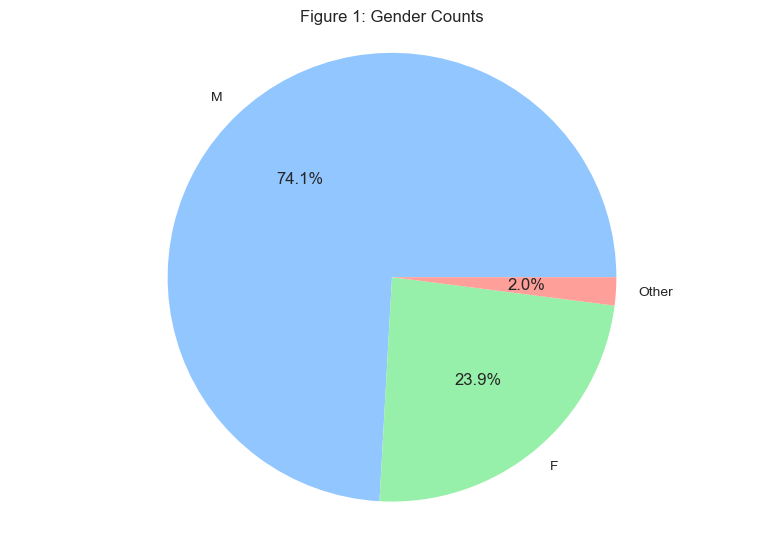

In [17]:
plt.style.use('seaborn-v0_8-pastel')
fig1, ax1 = plt.subplots()

# plotting pie chart for gender counts
ax1.pie(df1['Gender'].value_counts() , labels=df1['Gender'].unique(), autopct='%1.1f%%')
ax1.set_title('Figure 1: Gender Counts')
ax1.axis('equal')
plt.tight_layout()
plt.savefig('Figure 1.png')
plt.show()

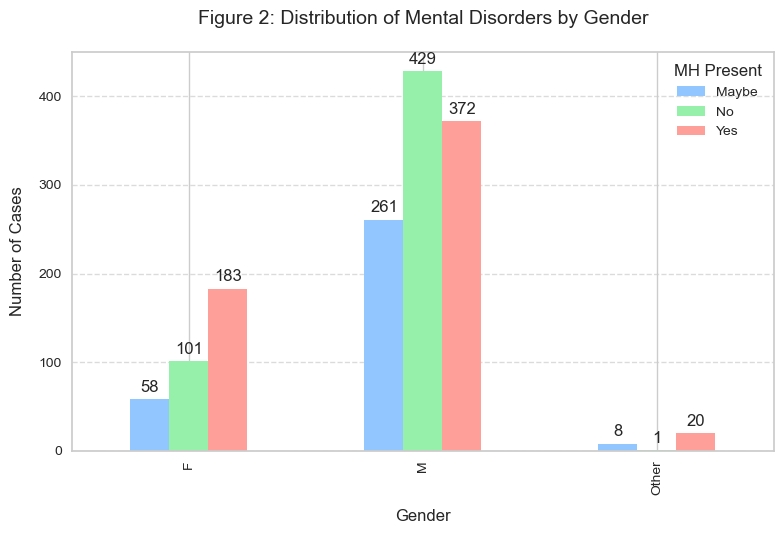

In [18]:
# Mental health group by Gender and MH present
mh_gender = df1.groupby(['Gender', 'MH Present']).size().unstack(fill_value=0)

mh_gender.plot(kind='bar')
plt.title('Figure 2: Distribution of Mental Disorders by Gender', pad=20, size=14)
plt.xlabel('Gender', labelpad=10, size=12)
plt.ylabel('Number of Cases', labelpad=10, size=12)
plt.xticks(rotation=90)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Add value labels on bars
for container in plt.gca().containers:
    plt.bar_label(container, padding=3)
plt.tight_layout()
plt.savefig('Figure 2.png')
plt.show()

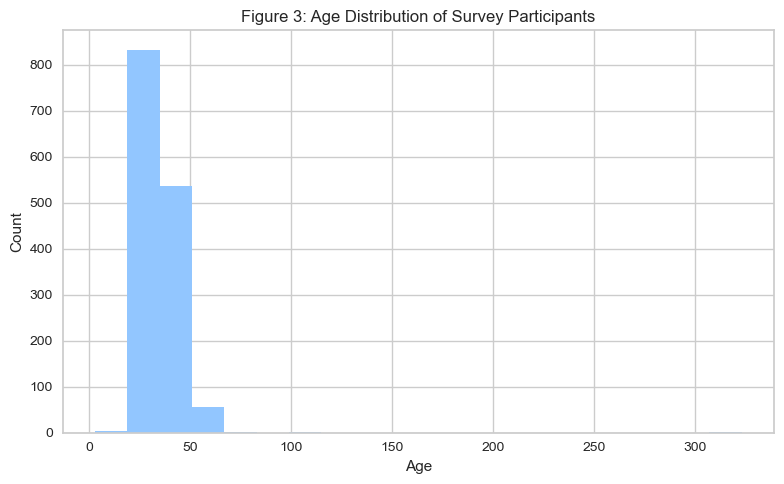

In [19]:
# Age Distribution of Survey Participants

plt.figure(figsize=(8, 5))
plt.hist(df1['Age'], bins=20)
plt.title("Figure 3: Age Distribution of Survey Participants")
plt.xlabel("Age")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig('Figure 3.png')
plt.show()

In [20]:
# Calculate the mean of age between 18 and 75
mean_age = df1[(df1['Age']>=18) | (df1['Age']<=75)]['Age'].mean().round()
print(mean_age)

34.0


In [21]:
df1['Age'].replace(df1[(df1['Age']<18) | (df1['Age']>75)]['Age'].to_list(), mean_age, inplace = True)

/var/folders/68/d21xtbv549s8tn0b9z97hhch0000gn/T/ipykernel_12123/3427087501.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['Age'].replace(df1[(df1['Age']<18) | (df1['Age']>75)]['Age'].to_list(), mean_age, inplace = True)
/var/folders/68/d21xtbv549s8tn0b9z97hhch0000gn/T/ipykernel_12123/3427087501.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, se

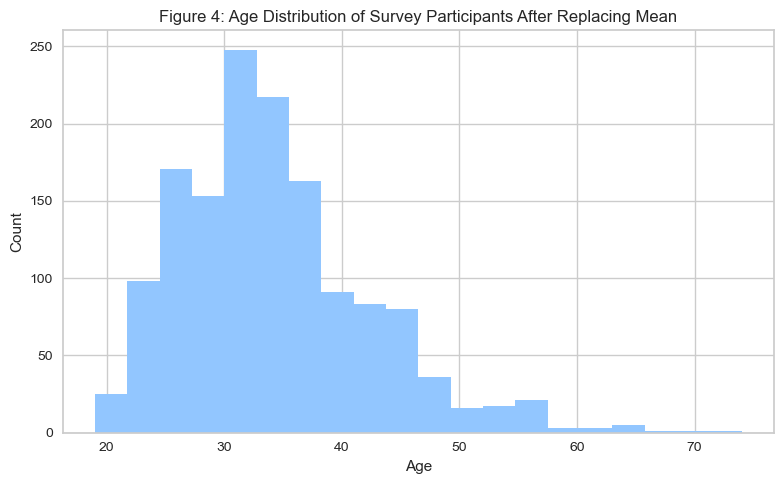

In [22]:
plt.figure(figsize=(8, 5))
plt.hist(df1['Age'], bins =20)
plt.title("Figure 4: Age Distribution of Survey Participants After Replacing Mean")
plt.xlabel("Age")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig('Figure 4.png')

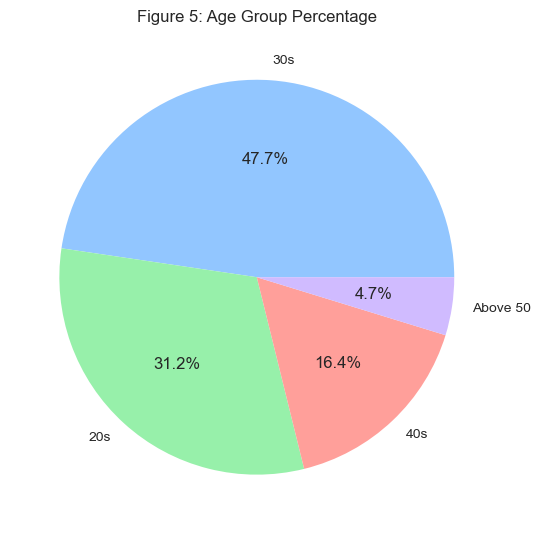

In [23]:
# Create Age Group
df1["Age Group"] = pd.cut(df1["Age"], bins = [0, 29, 39, 49, 100], labels= ["20s", "30s", "40s", "Above 50"])

# Plot
plt.pie(df1["Age Group"].value_counts(), labels= df1["Age Group"].unique(), autopct='%1.1f%%')
ax1.axis('equal')
plt.title('Figure 5: Age Group Percentage')
plt.tight_layout()
plt.savefig('Figure 5.png')
plt.show()

/var/folders/68/d21xtbv549s8tn0b9z97hhch0000gn/T/ipykernel_12123/3188952660.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mh_age_group = df1.groupby(['Age Group', 'MH Present']).size().unstack(fill_value=0)


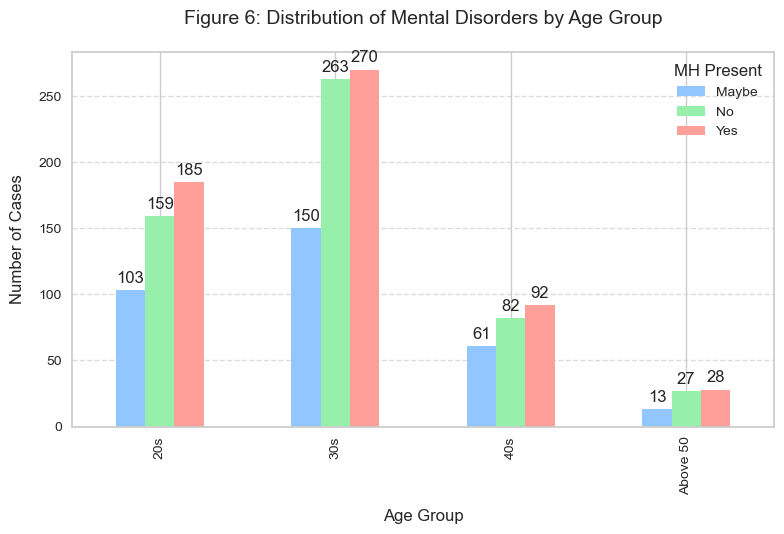

In [24]:
# Mental health group by Gender and MH present
mh_age_group = df1.groupby(['Age Group', 'MH Present']).size().unstack(fill_value=0)

mh_age_group.plot(kind='bar')
plt.title('Figure 6: Distribution of Mental Disorders by Age Group', pad=20, size=14)
plt.xlabel('Age Group', labelpad=10, size=12)
plt.ylabel('Number of Cases', labelpad=10, size=12)
plt.xticks(rotation=90)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Add value labels on bars
for container in plt.gca().containers:
    plt.bar_label(container, padding=3)
plt.tight_layout()
plt.savefig('Figure 6.png')
plt.show()

In [25]:
df1['Work Position'].unique()

array(['Back-end Developer', 'Back-end Developer|Front-end Developer',
       'Supervisor/Team Lead',
       'Executive Leadership|Supervisor/Team Lead|Dev Evangelist/Advocate|DevOps/SysAdmin|Support|Back-end Developer|Front-end Developer',
       'DevOps/SysAdmin|Support|Back-end Developer|Front-end Developer|Designer',
       'Dev Evangelist/Advocate|Back-end Developer',
       'Support|Back-end Developer|One-person shop',
       'One-person shop|Front-end Developer|Back-end Developer',
       'Front-end Developer', 'Executive Leadership',
       'Supervisor/Team Lead|Dev Evangelist/Advocate|Back-end Developer|Front-end Developer',
       'DevOps/SysAdmin|Back-end Developer|Front-end Developer',
       'Designer', 'Other|Executive Leadership', 'One-person shop',
       'Other', 'Supervisor/Team Lead|Support|Back-end Developer',
       'Supervisor/Team Lead|DevOps/SysAdmin|Back-end Developer',
       'Other|Supervisor/Team Lead|Support|Back-end Developer|Designer',
       'Supervisor/

In [26]:
work_position = df1['Work Position'].unique()

job_cat = {'IT' : ['Back', 'Developer', 'Front'],
           'DevOps' : ['DevOps', 'SysAdmin'],
          'Management' : ['Supervisor', 'Team', 'Lead', 'Executive', 'Leadership'],
          'Support': ['Support'],
          'One-person shop':['One', 'person', 'shop'],
          'HR' : ['HR'], 'Advocacy': ['Evangelist', 'Advocate'],
    'Design': ['Design'], 
    'Sales': ['Sales'],'Other' : ['Other']}

for job in work_position:
    for word in job.lower().split():
        for key, values in job_cat.items():
            if any(value.lower() in word for value in values):
                df1['Work Position'].replace(job, value=key, inplace=True)
                break
                
df1['Work Position'].value_counts()

/var/folders/68/d21xtbv549s8tn0b9z97hhch0000gn/T/ipykernel_12123/451420296.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['Work Position'].replace(job, value=key, inplace=True)


Work Position
IT                 742
Management         272
Other              121
One-person shop    110
DevOps              79
Support             42
Design              28
Advocacy            28
HR                   7
Sales                4
Name: count, dtype: int64

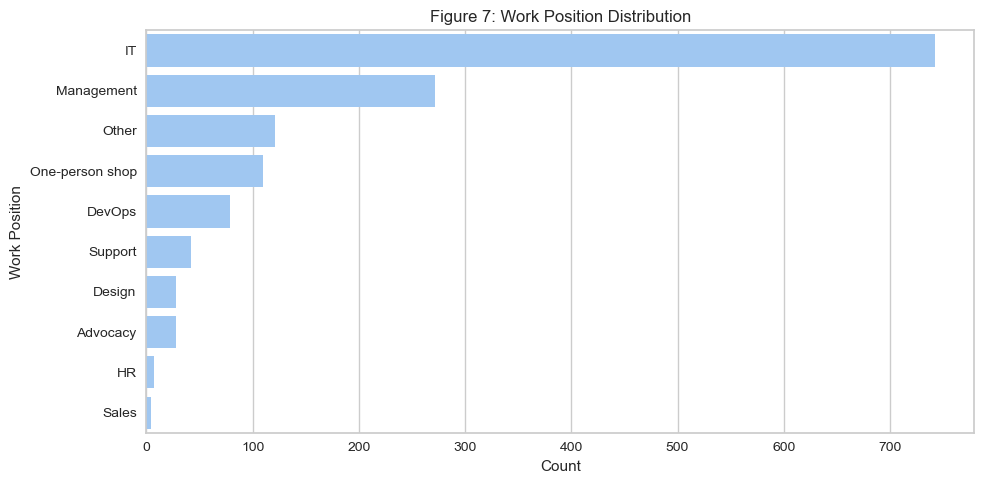

In [27]:
plt.figure(figsize=(10, 5))
sns.countplot(y=df1['Work Position'], order=df1['Work Position'].value_counts().index)
plt.title("Figure 7: Work Position Distribution")
plt.xlabel("Count")
plt.ylabel("Work Position")
plt.tight_layout()
plt.savefig('Figure 7.png')
plt.show()

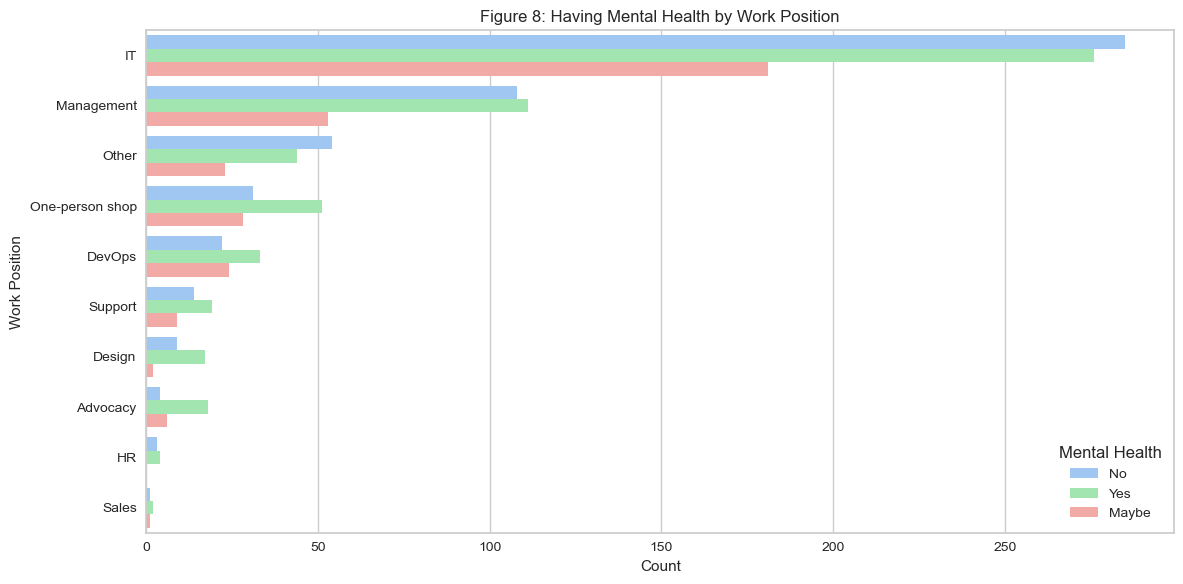

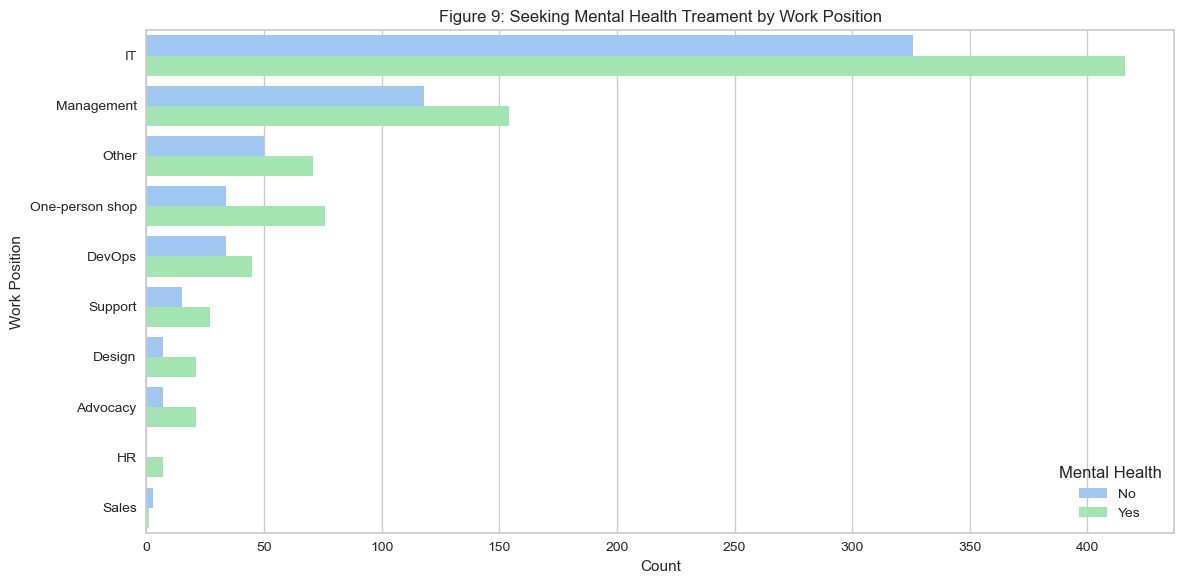

In [28]:
# Mental healthough grouped by work position
plt.figure(figsize=(12, 6))
sns.countplot(y=df1["Work Position"], order=df1["Work Position"].value_counts().index, hue=df1["MH Present"])
plt.title("Figure 8: Having Mental Health by Work Position")
plt.xlabel("Count")
plt.ylabel("Work Position")
plt.legend(title="Mental Health", labels=["No", "Yes", "Maybe"])
plt.tight_layout()
plt.savefig('Figure 8.png')
plt.show()

# Seek Mental Health Treatment grouped by work position
plt.figure(figsize = (12,6))
sns.countplot(y =df1['Work Position'], order =df1['Work Position'].value_counts().index, hue = df1['MH Sought Treatment'])
plt.title("Figure 9: Seeking Mental Health Treament by Work Position")
plt.xlabel("Count")
plt.ylabel("Work Position")
plt.legend(title="Mental Health", labels=["No", "Yes"])
plt.tight_layout()
plt.savefig('Figure 9.png')
plt.show()

In [29]:
country = ['France', 'Venezuela', 'Poland', 'Belgium', 'Brazil', 'Denmark',
       'Sweden', 'Russia', 'Spain', 'India', 'Mexico', 'Switzerland',
       'Norway', 'Argentina', 'Ireland', 'Italy', 'Finland', 'Colombia',
       'Costa Rica', 'Vietnam', 'Bulgaria', 'New Zealand', 'South Africa',
       'Slovakia', 'Austria', 'Bangladesh', 'Algeria', 'Pakistan',
       'Afghanistan', 'Greece', 'Romania', 'Other', 'Brunei', 'Japan',
       'Iran', 'Hungary', 'Israel', 'Ecuador', 'Bosnia and Herzegovina',
       'China', 'Chile', 'Guatemala', 'Taiwan', 'Serbia', 'Estonia', 'Czech Republic', 'Lithuania', 'United Arab Emirates', 'Turkey']

df1['Country/Work'].replace(country, 'Others', inplace=True)
df1['Country/Work'].replace('United States of America', 'USA', inplace=True)
df1['Country/Work'].replace('United Kingdom', 'UK', inplace=True)

/var/folders/68/d21xtbv549s8tn0b9z97hhch0000gn/T/ipykernel_12123/2022678660.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['Country/Work'].replace(country, 'Others', inplace=True)


In [30]:
df1['Country/Work'].unique()

array(['UK', 'USA', 'Canada', 'Germany', 'Netherlands', 'Others',
       'Australia'], dtype=object)

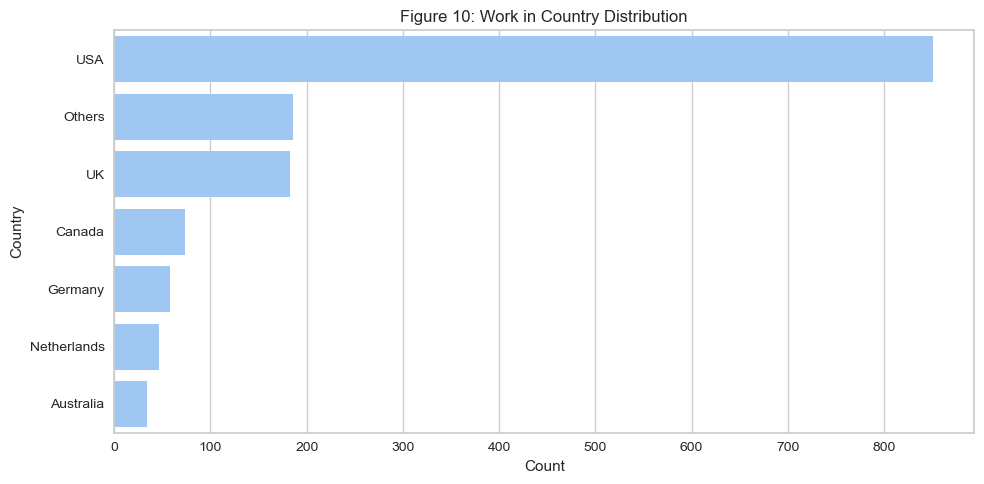

In [31]:
plt.figure(figsize=(10, 5))
sns.countplot(y=df1['Country/Work'], order=df1['Country/Work'].value_counts().index)
plt.title("Figure 10: Work in Country Distribution")
plt.xlabel("Count")
plt.ylabel("Country")
plt.tight_layout()
plt.savefig('Figure 10.png')
plt.show()

In [32]:
# Others Columns to Feature Engineering
cols_to_engineering = ["MH Benefits", "Prev MH Awareness", "Prev MHD", "Prev MH Resources", "MH on Career", "Neg View of Coworker"]

for i in cols_to_engineering:
    print(list(df1[i].unique()))

['Not eligible for coverage / N/A', 'No', 'Yes', "I don't know"]
['N/A (not currently aware)', 'I was aware of some', 'Yes, I was aware of all of them', 'No, I only became aware later']
["I don't know", 'None did', 'Some did', 'Yes, they all did']
['None did', 'Some did', 'Yes, they all did']
['Maybe', "No, I don't think it would", 'Yes, I think it would', 'No, it has not', 'Yes, it has']
["No, I don't think they would", 'Maybe', 'Yes, they do', 'Yes, I think they would', 'No, they do not']


In [33]:
# MH Benefits
df1["MH Benefits"] = df1["MH Benefits"].replace('Not eligible for coverage / N/A', "No")

# Prev MH Awareness
df1["Prev MH Awareness"] = df1["Prev MH Awareness"].replace(["N/A (not currently aware)","No, I only became aware later"], "No")
df1["Prev MH Awareness"] = df1["Prev MH Awareness"].replace(["I was aware of some", "Yes, I was aware of all of them"], "Yes")

# Prev MHD
df1["Prev MHD"] = df1["Prev MHD"].replace(["Some did", "Yes, they all did"], "Yes")

# Prev MH Resources
df1["Prev MH Resources"] = df1["Prev MH Resources"].replace(["Some did", "Yes, they all did"], "Yes")

# MH on Career
df1["MH on Career"] = df1["MH on Career"].replace(["No, I don't think it would", "No, it has not"], "No")
df1["MH on Career"] = df1["MH on Career"].replace(["Yes, I think it would", "Yes, it has"], "Yes")

# Neg View of Coworker
df1["Neg View of Coworker"] = df1["Neg View of Coworker"].replace(["No, I don't think they would", "No, they do not"], "No")
df1["Neg View of Coworker"] = df1["Neg View of Coworker"].replace(["Yes, they do", "Yes, I think they would"], "Yes")

In [34]:
for i in cols_to_engineering:
    print(list(df1[i].unique()))

['No', 'Yes', "I don't know"]
['No', 'Yes']
["I don't know", 'None did', 'Yes']
['None did', 'Yes']
['Maybe', 'No', 'Yes']
['No', 'Maybe', 'Yes']


In [35]:
# remove the unnecessary columns

columns_remove = ['Self-employed', 'Country/Live', 'Remote', 'Number of Employees','PH in Interview', 'Why/not','Why/not_1','Age Group']
df1.drop(df1[columns_remove], axis = 1, inplace=True)

In [36]:
# select the participants who were working in tech company

df1 = df1[df1['Tech Company'] == 1]
df1.drop(columns='Tech Company', axis = 1, inplace = True)

In [37]:
df1.shape

(1170, 40)

In [38]:
#checking duplicates

df1.duplicated().sum()

0

In [39]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1170 entries, 0 to 1432
Data columns (total 40 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   MH Benefits                         1170 non-null   object 
 1   MH Care Availability                1170 non-null   object 
 2   MH Discussion                       1170 non-null   object 
 3   MH resources                        1170 non-null   object 
 4   Anonymity Protected                 1170 non-null   object 
 5   Medical Leave                       1170 non-null   object 
 6   MHD Neg Result                      1170 non-null   object 
 7   PHD Neg Result                      1170 non-null   object 
 8   MHD w Coworkers                     1170 non-null   object 
 9   MHD w DS                            1170 non-null   object 
 10  MH = PH                             1170 non-null   object 
 11  MH Coworker States Neg Result       1170 non-nul

# Feature Scaling and Feature Selection

In [40]:
df_cleaned = df1.copy()
df_cleaned.to_csv("Cluster Data")

In [41]:
categorical_features = df_cleaned.select_dtypes(include=['object']).columns

# Encoding categorical features
label_encoders = {}
for col in categorical_features:
    le = LabelEncoder()
    df_cleaned[col] = le.fit_transform(df_cleaned[col])
    label_encoders[col] = le  # Store encoders for reference

# Standardize numerical features
scaler = StandardScaler()
numerical_features = df_cleaned.select_dtypes(include=['int64', 'float64']).columns

df_cleaned[numerical_features] = scaler.fit_transform(df_cleaned[numerical_features])


In [42]:
df_cleaned.head()

,MH Benefits,MH Care Availability,MH Discussion,MH resources,Anonymity Protected,Medical Leave,MHD Neg Result,PHD Neg Result,MHD w Coworkers,MHD w DS,MH = PH,MH Coworker States Neg Result,Prev Employers,Prev MH Benefits,Prev MH Awareness,Prev MHD,Prev MH Resources,Prev Anonymity Protected,Prev MHD Neg Result,Prev PHD Neg Result,Prev MHD w Coworkers,Prev MHD w DS,Prev MH = PH,Prev MH Coworker States Neg Result,MH in Interview,MH on Career,Neg View of Coworker,MH Share Family,MH Bad Response,MH Family History,MH Past,MH Present,MH Diagonosed,MH Sought Treatment,MH Effective Treatment,MH NOT Effective Treatment,Age,Gender,Country/Work,Work Position
0,-0.483134,0.044497,-0.146169,0.101165,-0.579195,1.557363,0.590020,0.347125,-0.783962,0.859389,-0.795912,-0.259843,0.358126,-0.477559,-0.820865,-2.308012,-0.642685,-0.578115,0.357729,-1.157801,0.394461,0.489743,-1.439260,-0.710904,-1.342337,-1.106608,0.156109,0.448984,-0.242529,-0.367336,0.867582,-0.224708,1.003425,-1.194733,-0.873337,-1.022977,0.661322,0.455107,0.054864,-0.299859
1,-0.483134,1.575716,2.104064,1.700660,1.880546,0.168027,0.590020,0.347125,-0.783962,0.859389,1.597963,-0.259843,0.358126,1.580431,1.218227,-0.276128,1.555973,2.279891,-0.655692,-1.157801,-1.408349,0.489743,1.062871,-0.710904,0.381630,-0.037466,0.156109,0.448984,-0.242529,0.951017,0.867582,1.064057,1.003425,0.837007,0.557762,1.552811,-0.610242,0.455107,0.660443,-0.299859
2,-0.483134,0.044497,-0.146169,0.101165,-0.579195,-1.221310,-0.804573,0.347125,-0.783962,-1.517644,-0.795912,-0.259843,0.358126,-0.477559,-0.820865,-0.276128,1.555973,-0.578115,-1.669114,0.592363,0.394461,-2.361000,-1.439260,1.043860,2.105598,-1.106608,-1.037668,0.448984,-1.224396,-0.367336,-1.768965,-0.224708,-0.996587,0.837007,-0.873337,-1.022977,0.534166,0.455107,0.054864,-0.299859
3,0.759211,0.044497,-0.146169,0.101165,-0.579195,0.168027,-0.804573,0.347125,-0.783962,0.859389,-0.795912,-0.259843,0.358126,0.551436,-0.820865,-0.276128,-0.642685,-0.578115,0.357729,0.592363,0.394461,0.489743,-1.439260,1.043860,-1.342337,1.031677,-1.037668,-2.190771,-0.242529,-0.367336,0.867582,1.064057,1.003425,0.837007,1.273311,1.552811,1.169948,0.455107,0.054864,0.338023
5,0.759211,-1.486723,-0.146169,1.700660,1.880546,0.168027,1.984613,2.750299,-0.783962,0.859389,0.401025,3.848482,0.358126,-0.477559,1.218227,-0.276128,-0.642685,-0.578115,1.371151,0.592363,-1.408349,-0.935629,-0.188195,1.043860,-1.342337,1.031677,-1.037668,0.448984,0.739337,-0.367336,-0.450692,1.064057,-0.996587,0.837007,-0.873337,-0.164381,1.042791,0.455107,0.054864,-0.299859


In [43]:
# Apply variance thresholding (removing low-variance features)
selector = VarianceThreshold(threshold=0.01)  # Removing features with variance lower than 0.01
X_selected = selector.fit_transform(df_cleaned)

# Get selected feature names
selected_features = df_cleaned.columns[selector.get_support()]

In [44]:
selected_features_df = pd.DataFrame(selected_features, columns=["Selected Features"])
selected_features_df

,Selected Features
0,MH Benefits
1,MH Care Availability
2,MH Discussion
3,MH resources
4,Anonymity Protected
5,Medical Leave
6,MHD Neg Result
7,PHD Neg Result
8,MHD w Coworkers
9,MHD w DS


## Principal Component Analysis (PCA)

[0.10969539 0.06952962 0.05541313 0.05336892 0.04723539 0.04344194
 0.03560392 0.03172874 0.03067732 0.02819119 0.0260158  0.02571609
 0.02502054 0.02354028 0.02249201 0.02234679 0.02174249 0.02109558
 0.02035909 0.01992751 0.01952233 0.01915054 0.01803983 0.01768832
 0.01715465 0.01565383 0.01471665 0.01446449 0.01418505 0.01317954
 0.01293253 0.01283589 0.01261688 0.01203641 0.01113619 0.01021457
 0.00984262 0.00945862 0.00635505 0.00567425]
[0.10969539 0.17922501 0.23463814 0.28800707 0.33524246 0.3786844
 0.41428832 0.44601706 0.47669437 0.50488556 0.53090136 0.55661745
 0.581638   0.60517828 0.62767029 0.65001708 0.67175958 0.69285515
 0.71321424 0.73314175 0.75266408 0.77181462 0.78985445 0.80754277
 0.82469742 0.84035125 0.8550679  0.86953239 0.88371744 0.89689698
 0.90982951 0.9226654  0.93528228 0.94731869 0.95845489 0.96866946
 0.97851208 0.9879707  0.99432575 1.        ]


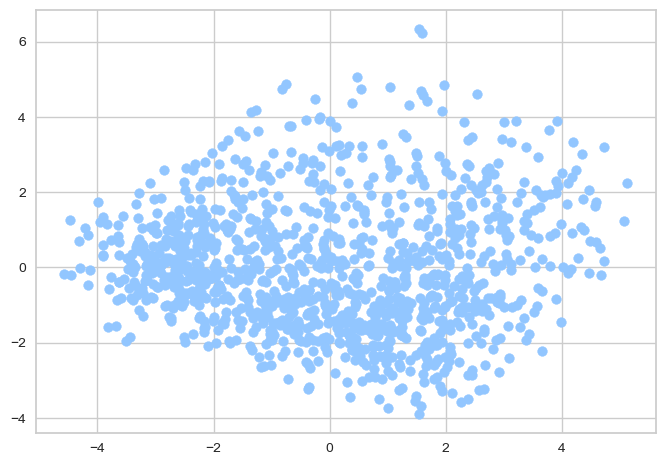

In [45]:
X_std = df_cleaned

pca = PCA().fit(X_std)

# extract the explaind variance ratios
var_exp = pca.explained_variance_ratio_
print(var_exp)

# calculate the explained cumulative variance
cum_var_exp = np.cumsum(var_exp)
print(cum_var_exp)

Y = PCA().fit(X_std).transform(X_std)
plt.scatter(x=Y[:,0], y=Y[:,1])
plt.show()

[0.10969539 0.06952962 0.05541313 0.05336892 0.04723539 0.04344194
 0.03560392 0.03172874 0.03067732 0.02819119 0.0260158  0.02571609
 0.02502054 0.02354028 0.02249201 0.02234679 0.02174249 0.02109558
 0.02035909 0.01992751 0.01952233 0.01915054 0.01803983 0.01768832
 0.01715465 0.01565383 0.01471665 0.01446449 0.01418505 0.01317954
 0.01293253 0.01283589 0.01261688 0.01203641 0.01113619]
[0.10969539 0.17922501 0.23463814 0.28800707 0.33524246 0.3786844
 0.41428832 0.44601706 0.47669437 0.50488556 0.53090136 0.55661745
 0.581638   0.60517828 0.62767029 0.65001708 0.67175958 0.69285515
 0.71321424 0.73314175 0.75266408 0.77181462 0.78985445 0.80754277
 0.82469742 0.84035125 0.8550679  0.86953239 0.88371744 0.89689698
 0.90982951 0.9226654  0.93528228 0.94731869 0.95845489]


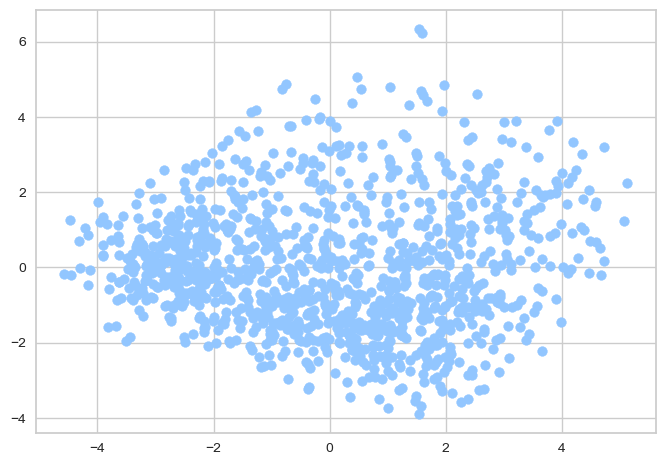

In [46]:
pca = PCA(n_components=0.95).fit(X_std)

# extract the explaind variance ratios
var_exp = pca.explained_variance_ratio_
print(var_exp)

# calculate the explained cumulative variance
cum_var_exp = np.cumsum(var_exp)
print(cum_var_exp)

Y = PCA(n_components=0.95).fit(X_std).transform(X_std)
plt.scatter(x=Y[:,0], y=Y[:,1])
plt.show()

In [47]:
num_components = pca.n_components_
num_components

35

In [48]:
X_pca = pca.transform(X_std)

# K-Mean

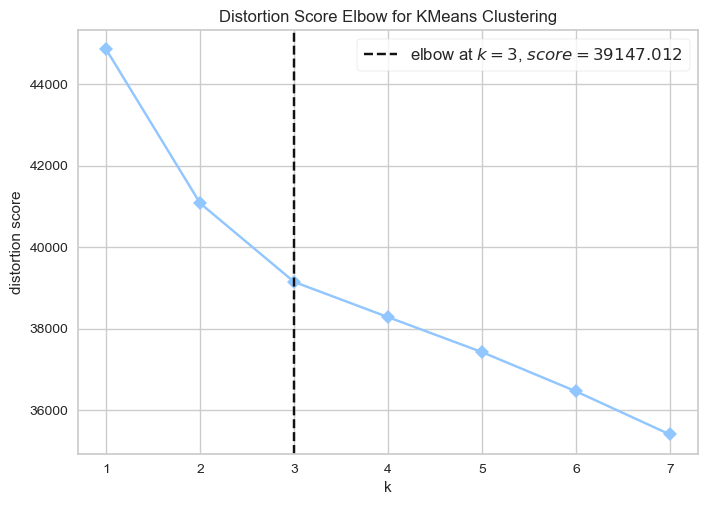

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [49]:
# Choosing the number of cluster
model = KMeans()
# Elbow method
visualizer = KElbowVisualizer(model, k=(1,8), timings=False)

# fit the visualizer and show the plot
visualizer.fit(X_pca)
plt.savefig('Figure 11.png')
visualizer.show()

0.07264888924820903


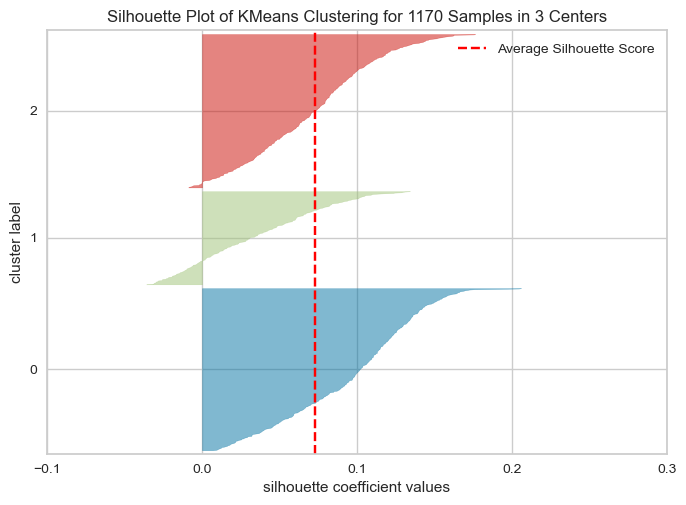

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 1170 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [50]:
optimal_k = 3

model = KMeans(n_clusters= optimal_k,random_state=0).fit(X_pca)
# extract labels, i.e. cluster associations
lab = model.labels_

# calculate the overall Silhouette score
S = silhouette_score(X_pca, lab)
print(S)

# generate, fit and show a Silhouette visualizer
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(X_pca)
plt.savefig('Figure 12.png')
visualizer.show()

In [51]:
# Performing K mean

kmeans = KMeans(n_clusters=optimal_k, random_state=0)
df_cleaned['Clusters'] = kmeans.fit_predict(X_pca)

In [52]:
cluster_characteristics = []
sizes = []
centers = kmeans.cluster_centers_
labels = kmeans.labels_
for i in range(optimal_k):
    cluster_data = X_pca[labels == i]
    cluster_size = len(cluster_data)
    cluster_center = centers[i]
    avg_distance = np.mean(np.linalg.norm(cluster_data - cluster_center, axis=1))
    cluster_characteristics.append({
        "Cluster": i + 1,
        "Size": cluster_size,
        "Avg Distance": avg_distance,
    })
    sizes.append(cluster_size)

cluster_characteristics

[{'Cluster': 1, 'Size': 464, 'Avg Distance': 5.567599709634409},
 {'Cluster': 2, 'Size': 267, 'Avg Distance': 6.060592645120416},
 {'Cluster': 3, 'Size': 439, 'Avg Distance': 5.663828521905798}]

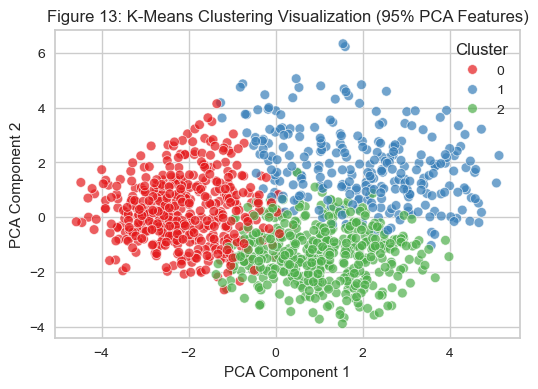

In [53]:
fig, ax = plt.subplots(figsize=(6,4))

# add data points
sns.scatterplot(x=X_pca[:,0], y=X_pca[:, 1], hue=df_cleaned['Clusters'], palette="Set1", alpha=0.7)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Figure 13: K-Means Clustering Visualization (95% PCA Features)")
plt.legend(title="Cluster")
plt.savefig("Figure 13.png")
plt.show()

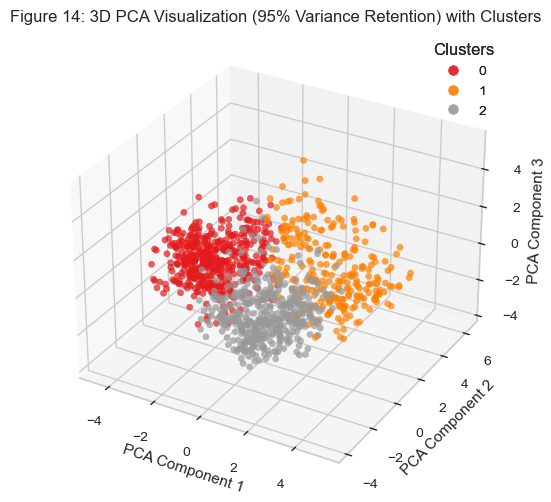

In [54]:
df_pca = pd.DataFrame(X_pca[:, :3], columns=["PCA1", "PCA2", "PCA3"])

# 3D PCA Scatter Plot (95% Variance Retention) with Clusters
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df_pca["PCA1"], df_pca["PCA2"], df_pca["PCA3"], c=df_cleaned["Clusters"], cmap='Set1', alpha=0.7)
ax.set_xlabel("PCA Component 1")
ax.set_ylabel("PCA Component 2")
ax.set_zlabel("PCA Component 3")
ax.set_title("Figure 14: 3D PCA Visualization (95% Variance Retention) with Clusters")

# Add legend for clusters
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)
plt.savefig("Figure 14.png")
plt.show()

# Visualization for the Cluster

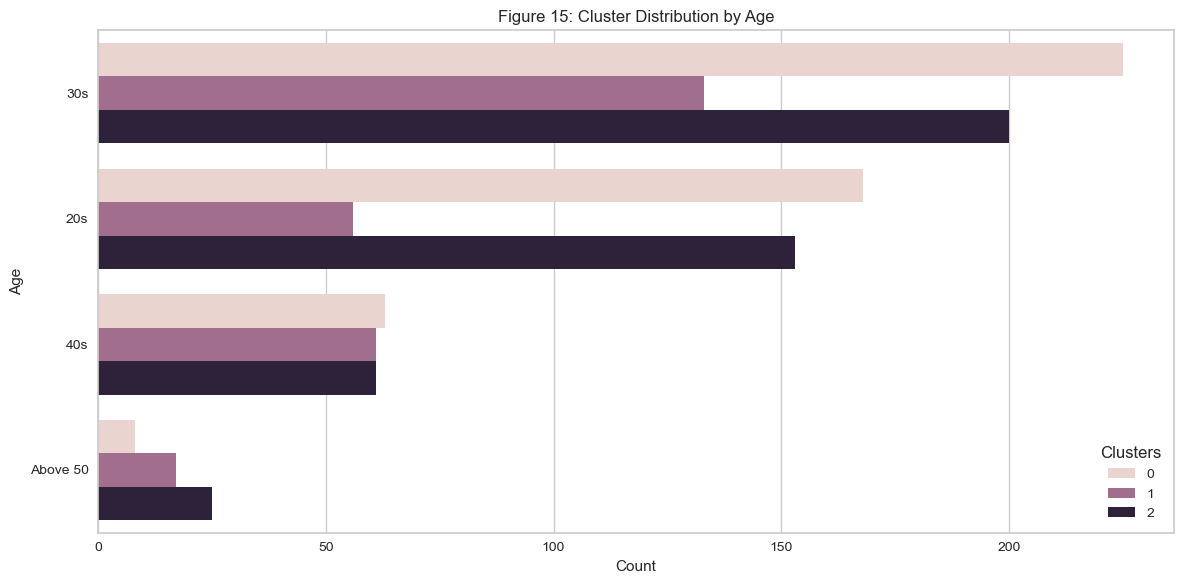

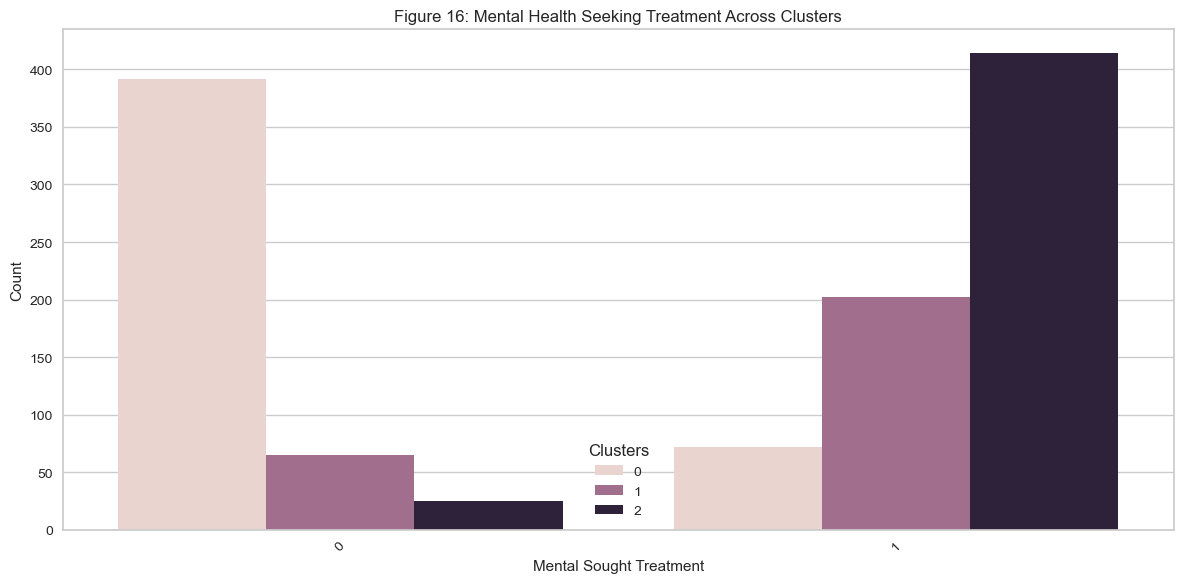

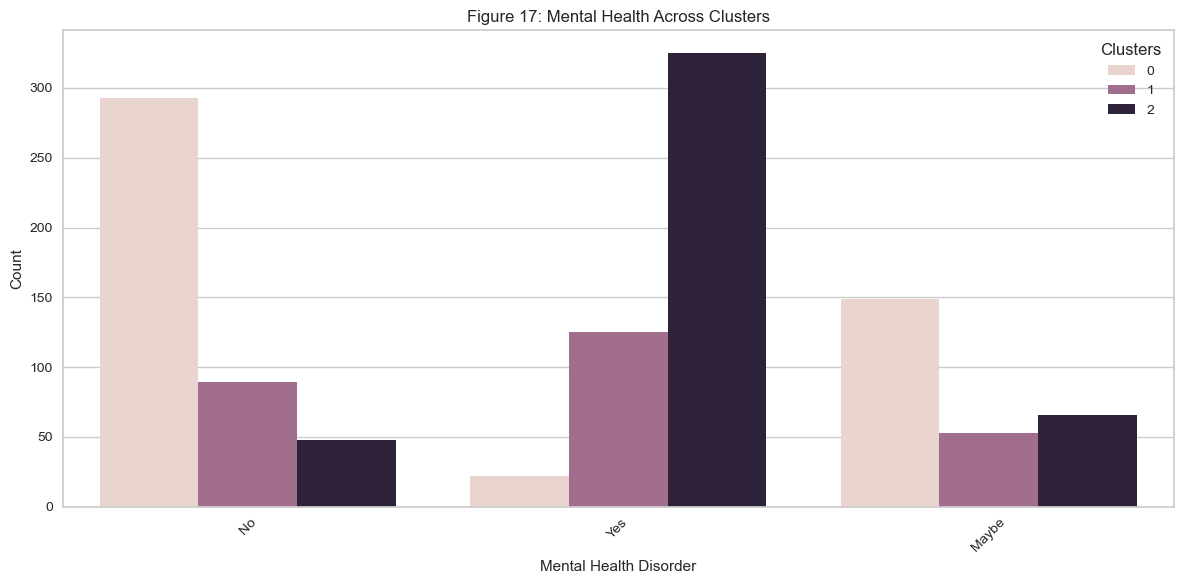

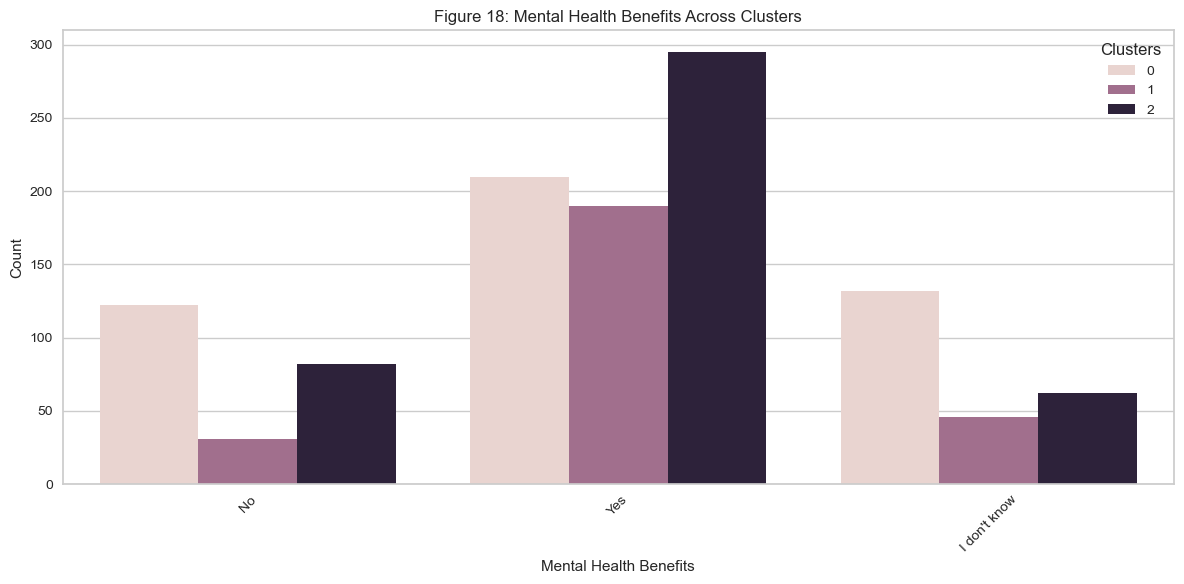

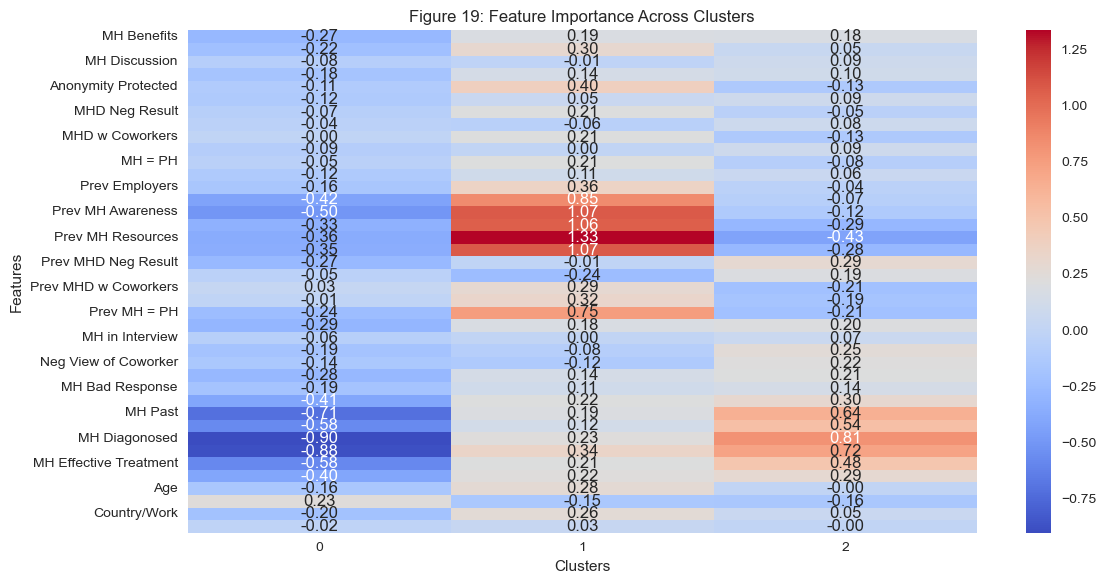

In [55]:
# Analyze Cluster Characteristics
cluster_means = df_cleaned.groupby("Clusters").mean()

# Cluster Distribution by Age Group
plt.figure(figsize = (12, 6))
age_group = pd.cut(df1["Age"], bins = [0, 29, 39, 49, 100], labels= ["20s", "30s", "40s", "Above 50"])
sns.countplot(y = age_group, hue = df_cleaned["Clusters"], order = age_group.value_counts().index)
plt.title("Figure 15: Cluster Distribution by Age")
plt.xlabel("Count")
plt.ylabel("Age")
plt.legend(title="Clusters")
plt.tight_layout()
plt.savefig("Figure 15.png")
plt.show()

# Cluster Distribution by MH Sought Treatment
plt.figure(figsize=(12, 6))
sns.countplot(x=df1["MH Sought Treatment"], hue=df_cleaned["Clusters"])
plt.title("Figure 16: Mental Health Seeking Treatment Across Clusters")
plt.xlabel("Mental Sought Treatment")
plt.ylabel("Count")
plt.legend(title="Clusters")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("Figure 16.png")
plt.show()

# Mental Health Across Clusters
plt.figure(figsize=(12, 6))
sns.countplot(x=df1["MH Present"], hue=df_cleaned["Clusters"])
plt.title("Figure 17: Mental Health Across Clusters")
plt.xlabel("Mental Health Disorder")
plt.ylabel("Count")
plt.legend(title="Clusters")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("Figure 17.png")
plt.show()

# Cluster Distribution by MH Benefits
plt.figure(figsize=(12, 6))
sns.countplot(x=df1["MH Benefits"], hue=df_cleaned["Clusters"])
plt.title("Figure 18: Mental Health Benefits Across Clusters")
plt.xlabel("Mental Health Benefits")
plt.ylabel("Count")
plt.legend(title="Clusters")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("Figure 18.png")
plt.show()

# Heatmap of Cluster Feature Importance
plt.figure(figsize=(12, 6))
sns.heatmap(cluster_means.T, cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Figure 19: Feature Importance Across Clusters")
plt.xlabel("Clusters")
plt.ylabel("Features")
plt.tight_layout()
plt.savefig("Figure 19.png")
plt.show()

In [56]:
cluster_mean_df = pd.DataFrame(cluster_means)
cluster_mean_df

,MH Benefits,MH Care Availability,MH Discussion,MH resources,Anonymity Protected,Medical Leave,MHD Neg Result,PHD Neg Result,MHD w Coworkers,MHD w DS,MH = PH,MH Coworker States Neg Result,Prev Employers,Prev MH Benefits,Prev MH Awareness,Prev MHD,Prev MH Resources,Prev Anonymity Protected,Prev MHD Neg Result,Prev PHD Neg Result,Prev MHD w Coworkers,Prev MHD w DS,Prev MH = PH,Prev MH Coworker States Neg Result,MH in Interview,MH on Career,Neg View of Coworker,MH Share Family,MH Bad Response,MH Family History,MH Past,MH Present,MH Diagonosed,MH Sought Treatment,MH Effective Treatment,MH NOT Effective Treatment,Age,Gender,Country/Work,Work Position
Clusters,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,-0.274292,-0.216206,-0.078274,-0.181505,-0.107392,-0.117925,-0.071209,-0.041319,-0.004224,-0.085789,-0.050406,-0.118176,-0.164683,-0.424335,-0.504454,-0.333056,-0.363114,-0.354320,-0.266923,-0.045089,0.029237,-0.010980,-0.239423,-0.294904,-0.064223,-0.194150,-0.142335,-0.280647,-0.193859,-0.409955,-0.712073,-0.577452,-0.901759,-0.879463,-0.580332,-0.404936,-0.157795,0.234960,-0.202246,-0.019411
1,0.186895,0.296833,-0.011324,0.143099,0.397331,0.053549,0.208727,-0.057904,0.213241,0.000274,0.212743,0.109445,0.358126,0.852041,1.073123,1.055631,1.333637,1.073891,-0.010443,-0.240112,0.286427,0.324250,0.753619,0.176336,0.000679,-0.077508,-0.116626,0.137552,0.110501,0.215307,0.191164,0.122824,0.231885,0.342389,0.212047,0.224721,0.275090,-0.147250,0.261260,0.034611
2,0.176243,0.047985,0.089619,0.104808,-0.128150,0.092072,-0.051683,0.078889,-0.125229,0.090508,-0.076114,0.058342,-0.043751,-0.069712,-0.119492,-0.290013,-0.427326,-0.278643,0.288475,0.193693,-0.205107,-0.185604,-0.205293,0.204451,0.067468,0.252347,0.221373,0.212969,0.137692,0.302351,0.636358,0.535634,0.812080,0.721305,0.484414,0.291320,-0.000529,-0.158783,0.054864,-0.000534
